## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

## Loading Dataset

In [2]:
df = sns.load_dataset("penguins")
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [3]:
print(f"number of samples: {len(df)}")

number of samples: 344


## Information about the dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Check the number of null values

In [5]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## Drop the null values

In [6]:
df.dropna(inplace=True)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

## Feature Engineering

### Convert binary features to 0 and 1

In [7]:
df["sex"] = df["sex"].map({"Male": 1, "Female": 0})
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0


### One Hot Encoding (transforming categorical data to numeric)

In [8]:
island = pd.get_dummies(df["island"], dtype="int", drop_first=True)
df = df.drop("island", axis="columns")
df = pd.concat((df, island), axis="columns")
df.head(3)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,0,1


### Label Encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["species"] = le.fit_transform(df["species"])
df.head()

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,Dream,Torgersen
0,0,39.1,18.7,181.0,3750.0,1,0,1
1,0,39.5,17.4,186.0,3800.0,0,0,1
2,0,40.3,18.0,195.0,3250.0,0,0,1
4,0,36.7,19.3,193.0,3450.0,0,0,1
5,0,39.3,20.6,190.0,3650.0,1,0,1


### Check the dtypes

In [10]:
df.dtypes

species                int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
Dream                  int64
Torgersen              int64
dtype: object

## Matrix of features and Matrix of labels

In [11]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values
print(f"features matrix: {X.shape}")
print(f"labels matrix: {y.shape}")

features matrix: (333, 7)
labels matrix: (333,)


## Splitting the dataset into training and test.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(f"X_train {X_train.shape}")
print(f"X_test {X_test.shape}")
print(f"y_train {y_train.shape}")
print(f"y_test {y_test.shape}")

X_train (233, 7)
X_test (100, 7)
y_train (233,)
y_test (100,)


## Training random forest classification on training set

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

clf = RandomForestClassifier(n_estimators=7, criterion="gini", random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=7, random_state=0)

## Predicting the test results

In [14]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0, 1, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 0,
       2, 2, 1, 2, 2, 1, 2, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 1, 2, 1, 0,
       0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 2])

## Validation the result


model accurary is: 0.980

confusion matrix:
[[48  0  0]
 [ 2 14  0]
 [ 0  0 36]]

classification report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        48
           1       1.00      0.88      0.93        16
           2       1.00      1.00      1.00        36

    accuracy                           0.98       100
   macro avg       0.99      0.96      0.97       100
weighted avg       0.98      0.98      0.98       100



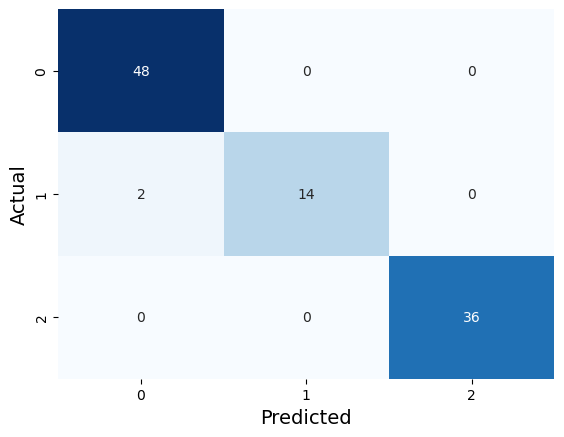

In [15]:
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f"\nmodel accurary is: {acc:.3f}")
print(f"\nconfusion matrix:\n{cm}")
print(f"\nclassification report:\n{report}")
ax = sns.heatmap(cm, annot=True, cmap="Blues", cbar=False)
ax.set_xlabel("Predicted", fontsize=14)
ax.set_ylabel("Actual", fontsize=14);